<a href="https://colab.research.google.com/github/rafaborneo/rafaelborneo/blob/master/Nuevo_Borneo_Copia_de_Entregable_Pract2_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [ ]:
pip install plotly --upgrade

     |████████████████████████████████| 19.1MB 1.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# To update plotly, uncomment and run the following line:
#pip install plotly --upgrade

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:7]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


# ***INSPECCION DEL DATA SET***

In [ ]:
len(melb_df)

13580

In [ ]:
#NOMBRE DE LAS VARIABLES (COLUMNAS)
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# **Se puede notar que el count de cada variable es diferente a 13580 (numero de filas). por ejemplo la variable Car tiene 13518 (no muy diferente) pero la variable BuildingArea tiene 7130 (osea 48% datos faltantes) y la variable YearBuilt 8205 (39% datos faltantes).** 

### BUSCAMOS VALORES UNICOS

In [ ]:
#tipos de casa
pd.unique(melb_df.Type)
#h=House, u=Unit, t=Townhouse

array(['h', 'u', 't'], dtype=object)

In [ ]:
#como se vendieron
pd.unique(melb_df.Method)
#S - property sold; SP - property sold prior; PI - property passed in;  
#SN - sold not disclosed; VB - vendor bid;# 
#SA - sold after auction;


array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [ ]:
#numero de habitaciones
pd.unique(melb_df.Bedroom2.sort_values()) 
# Hay casas con lo que parece un numero excesivo de habitaciones (10?, 20?)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 20.])

In [ ]:
pd.unique(melb_df.Car.sort_values())
#Tambien parece que hay casas con un numero exesivo de coheras (8,,9,10,20??--parees datos erroneos)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

Landsize	BuildingArea tienen valores MAXIMOS muy altos. sacamos un quantile 95% para ver que tan cierto pueden ser estos valores tan altos

In [ ]:
melb_df.Landsize.quantile(0.95), melb_df.BuildingArea.quantile(0.95)
#puede verseque con quantiles de 95% el valor de las variables dsiminuye considerablemente por lo que PARECE que hay datos erroneos

(995.0, 294.0)

### **explorar variables con datos raros** Y NOS QUEDAMOS CON VALORES MAS LOGICOS

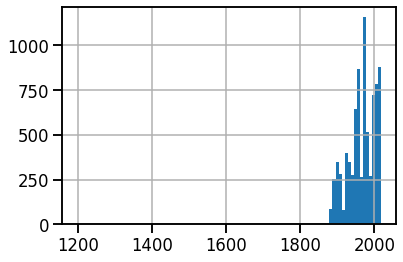

In [ ]:
melb_df.YearBuilt.hist(bins=100)
#AÑO DE CONSTRUCCION: GRAFICO MUESTRA que la mayoria fue construida despues de 1850
#se PUEDE ELIMANR DATOS MENORES A 1850

In [ ]:
melb_df.drop(melb_df.query('YearBuilt < 1850').index, inplace=True)

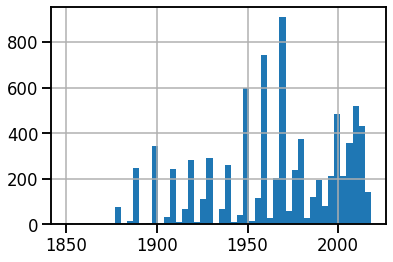

In [ ]:
melb_df.YearBuilt.hist(bins=50)

In [ ]:
#variable COCHERAS
melb_df.Car.value_counts()
# hAY propiedades con 7,8,9,10 COCHERAS


2.0     5591
1.0     5508
0.0     1026
3.0      748
4.0      505
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [ ]:
#se pueden ELIMINAR DATOS CON  MAS DE 6 COCHERAS (PARECEN RAROS/ERRONEOS)
melb_df = melb_df.query('Car < 7')
melb_df.Car.value_counts()

2.0    5591
1.0    5508
0.0    1026
3.0     748
4.0     505
5.0      63
6.0      54
Name: Car, dtype: int64

In [ ]:
#variable habitaciones
melb_df.Bedroom2.value_counts()

3.0     5859
2.0     3710
4.0     2586
1.0      688
5.0      555
6.0       62
0.0       16
7.0       10
8.0        5
9.0        2
10.0       1
20.0       1
Name: Bedroom2, dtype: int64

In [ ]:
#eliminamos propiedades con cero y mas de 5
melb_df = melb_df.query(' (Bedroom2 < 6) & (Bedroom2 > 0)')
melb_df.Bedroom2.value_counts()


3.0    5859
2.0    3710
4.0    2586
1.0     688
5.0     555
Name: Bedroom2, dtype: int64

In [ ]:
#hacemos lo mismo con el numero de baños; eliminamos cero baños y solo quedan aquellos con 5 BAÑOS O MENOS
melb_df = melb_df.query('(Bathroom > 0) & (Bathroom < 6)')
melb_df.Bathroom.value_counts()

1.0    7450
2.0    4922
3.0     875
4.0      91
5.0      28
Name: Bathroom, dtype: int64

### ***SELECCIONAR COLUMNAS (CON LAS QUE NOS QUEDAMOS)***

In [ ]:
#que VARIABLES TENEMOS EN EL DATASET ORIGINAL?
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

poner que significa cada variables

In [ ]:
#UN ANALISIS RAPIDO (INTUITIVO) NOS LLEVA A PENSAR QUE :

#LA VARIABLE SellerG NO PARECE ESTAR REFERIDA A LA PROPIEDAD SINO AL NOMBRE DEL VENDEDOR PORLO QUE
#NO CREEMOS QUE TENGA EFECTO SOBRE EL PRECIO DE LA PROPIEDAD
#LA VARIABLE 'Address' ES MUY ESPECIFICA, 
##eN CLASE VIMOS QUE LA VARIABLE bedroom2 ESTA MUY ASOCIADA A RoomS POR LO QUE SE PODRIA ELIMINAR
#LA VARIABLE METODO DE VENTA ESTA MUY DESBALANCEADA (CASI TODO SE VENDIO VENTA DIRECTA) POR LO QUE A PRIORI SE PODRIA ELIMINAR (MAS ADELANTE VER GRAFICO)
#POR LO QUE A PRIORI ELIMINAMOS LAS COLUMNAS 'Address', 'SellerG', 'Method'
#LAS VARIABLES COUNCILNAME Y PRPERTYCOUNT podrian EJERCER EFECTO SOBRE EL PRECIO POR LA RAZON DE 
#"DONDE ESTE LA PROPIEDAD ("COUNCILNAME") Y LA DENSIDAD DE PROPIEDADES EN UNA AREA DETERMINADA (PROPERTY COUNT)
#NOS PARECE QUE EL SUBURBIO ((suburb) DEBE TENER EFECTO SOBRE EL PRECIO ("barrios mas seguros", "barrios con mas/menos parques, barrios con mas/menos servicios" etc etc)
#lAS VARIABLES LONGITUD Y LATITUD ES MUY NUMEROSA PERO LA DEJAMOS PARA USARLAS COMO BASE/METODO PARA COMPLEMENTAR (MERGE) EL DATA SET CON EL DATASET DEL airbnb

In [ ]:
#VEAMOS LA RELACION DE LA VARIABLE PRECIO CON ALGUNAS VARIABLES POSIBLES A ELIMINAR 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 1000.0)

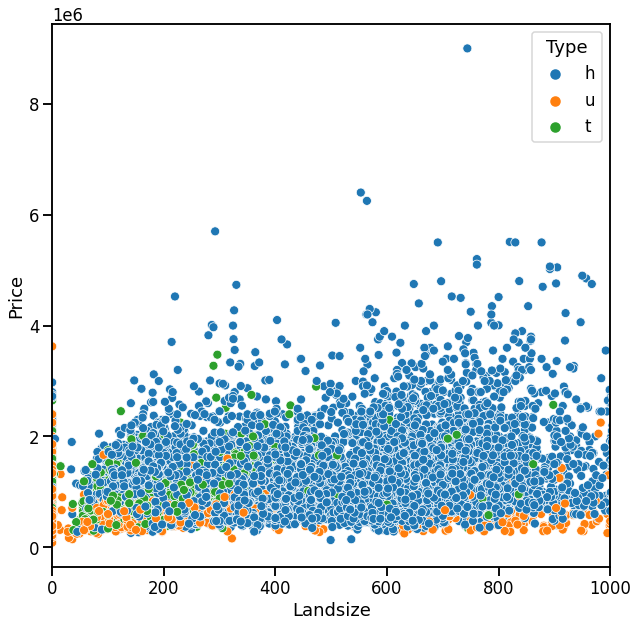

In [ ]:
#PRECIO VS TAMAÑO TERRENO Y TIPO DE PROPIEDAD
plt.figure(figsize=(10,10))
sns.scatterplot(melb_df.Landsize,melb_df.Price,hue=melb_df.Type)
plt.xlim(0,1000)

### CONCLUSION: PRECIO PARECE NO DEPENDER DEL TAMAÑO DE PROPIEDAD, INCLUSO DENTRO DE CADA TIPO DE PROPIEDAD. ESTA COLUMNA SE PODRIA ELIMINAR

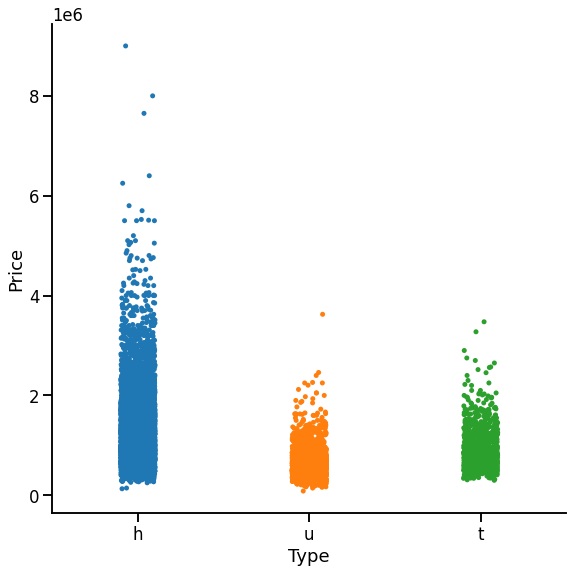

In [ ]:
#PRECIO VS TIPO DE PROPIEDAD
sns.catplot(data=melb_df, y='Price',
                x='Type', height=8, aspect=1) 

### EL TIPO de propiedad si parece tener efecto sobre el precio. las casas (h) prece tener precios mas altos 

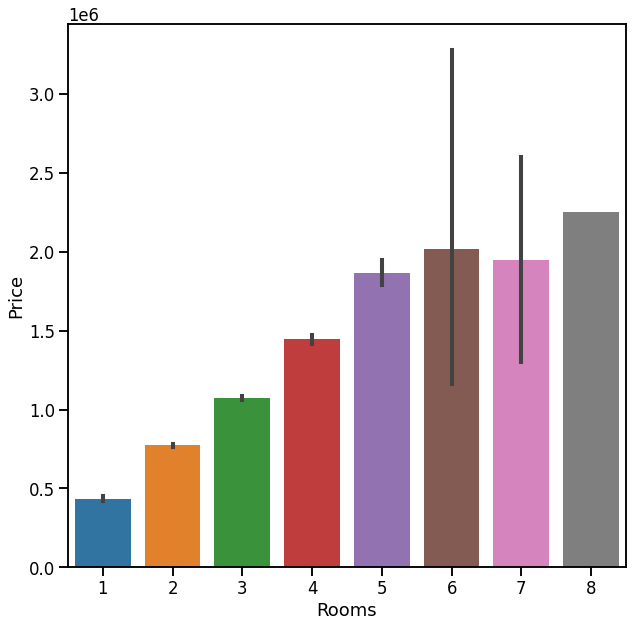

In [ ]:
#PRECIO CON NUMERO DE HABITACIONES (ROOMS)

plt.figure(figsize=(10,10))
sns.barplot(y=melb_df.Price,x=melb_df.Rooms) 

### ROOMS SI

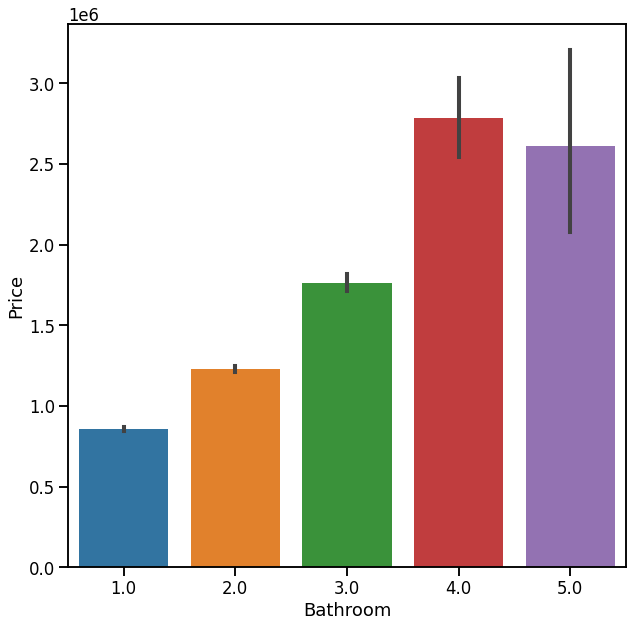

In [ ]:
#PRECIO VS NUMERO DE BAÑOS

plt.figure(figsize=(10,10))
sns.barplot(y=melb_df.Price,x=melb_df.Bathroom) 


### BAÑOS SI

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

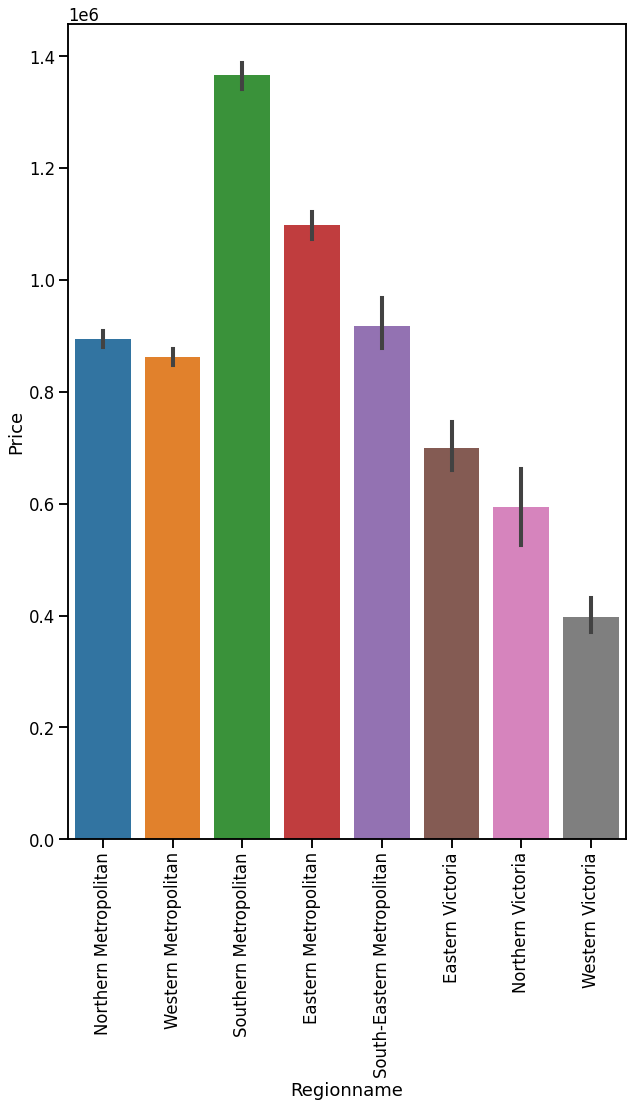

In [ ]:
#PRECIO VS REGIONNAME

plt.figure(figsize=(10,15))
sns.barplot(y=melb_df.Price,x=melb_df.Regionname) 
plt.xticks(rotation=90)
#SI HAY RELACION; NOS QUEDAMOS CON ESTA COLUMNA



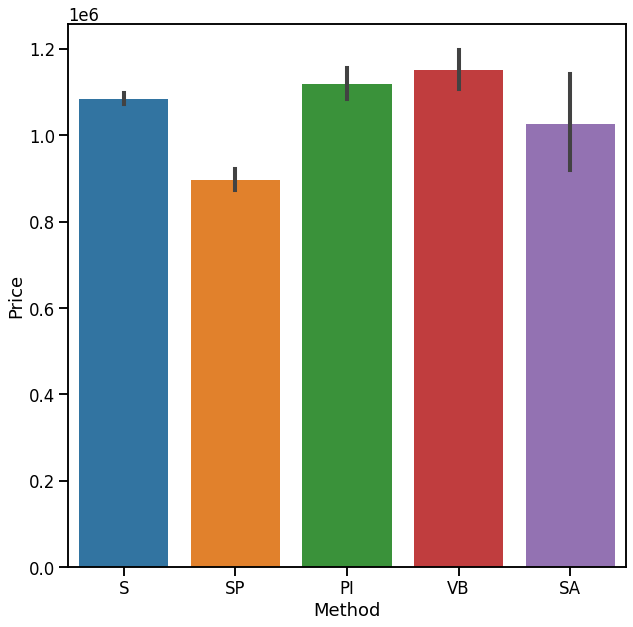

In [ ]:
#PRECIO VS METODO DE VENTA

plt.figure(figsize=(10,10))
sns.barplot(y=melb_df.Price,x=melb_df.Method) 

#NO PARECE HABER RELACION; SE PUEDE ELIMINAR ESTA COLUMNA

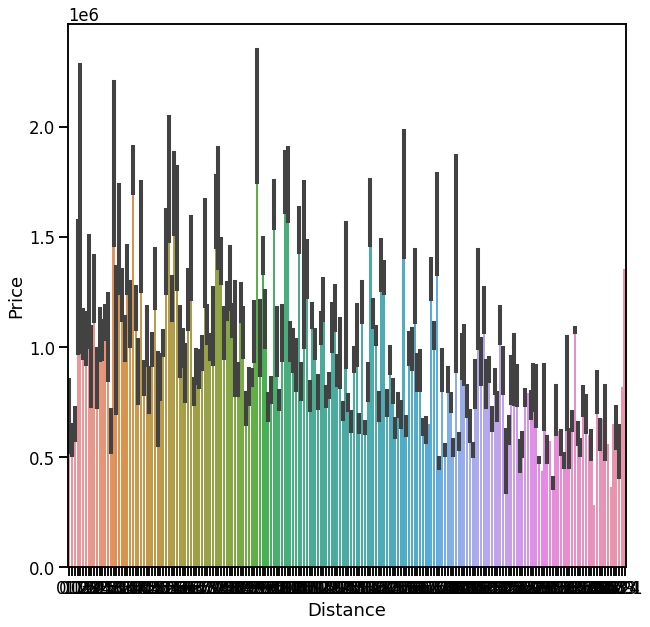

In [ ]:
#PRECIO VS DISTANCIA AL CENTRO
plt.figure(figsize=(10,10))
sns.barplot(y=melb_df.Price,x=melb_df.Distance) 
#ESTA MUY FEO NO SE ENTIENDE, VEAMOS CON UN LINEPLOT (PROXIMA CELDA)



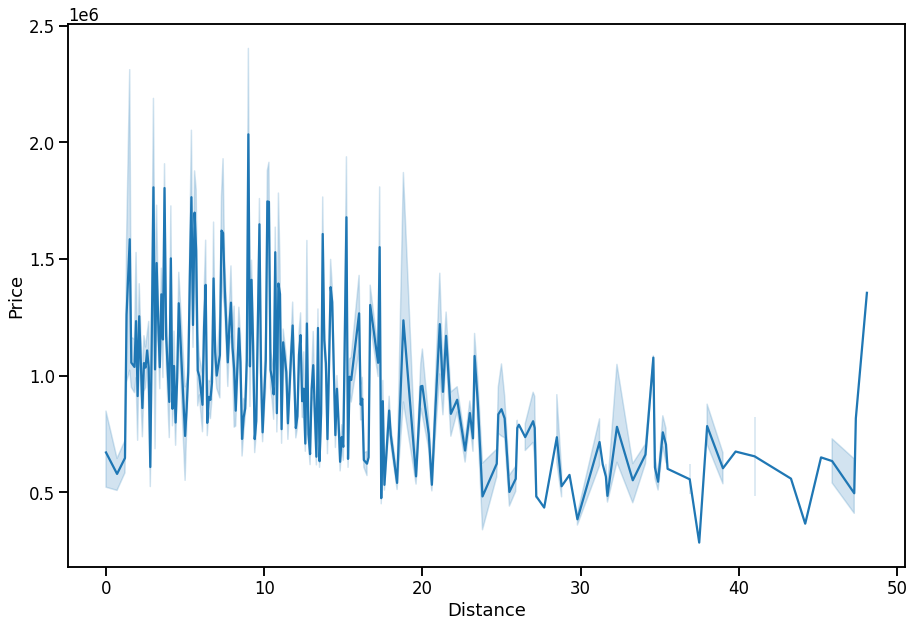

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(y=melb_df.Price,x=melb_df.Distance)
#EXCEPTO por valores raros, el precio de la propiedad parece dependder de distancia al cenro NOS QUEDAMOS CON ESTA VARIABLE

**texto en negrita**###  **texto en negrita**
 



## **EN BASE AL ANALISIS ANTERIOR (INTUICION Y GRAFICOS) NOS QUEDAMOS CON LAS VARIABLES (COLUMNAS): 
 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname', 'Suburb', 'Type','Rooms', 'Car','Distance', 'Postcode', 'Bathroom', , 'Lattitude',  Longtitude',  
'Price',**

### **NUEVO DATASET (CURADO)**

In [ ]:
melb_df_nuevo = melb_df.copy()
#hago una copia

In [ ]:
melb_df_nuevo

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
melb_df_nuevo = melb_df[['Type','Rooms', 'Price', 'Suburb', 'Bathroom', 'Car','BuildingArea', 'YearBuilt', 'CouncilArea',
        'Regionname','Distance', 'Postcode','Lattitude', 'Longtitude']]
        ##SELECCIONO COLUMNAS 

melb_df_nuevo

#SE REDUJO A 14 VARIABLES EN LUGAR DE LAS 21 ORIGINALES, tambien se redujo el numero de filas

,Type,Rooms,Price,Suburb,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Regionname,Distance,Postcode,Lattitude,Longtitude
0,h,2,1480000.0,Abbotsford,1.0,1.0,NaN,NaN,Yarra,Northern Metropolitan,2.5,3067.0,-37.79960,144.99840
1,h,2,1035000.0,Abbotsford,1.0,0.0,79.0,1900.0,Yarra,Northern Metropolitan,2.5,3067.0,-37.80790,144.99340
2,h,3,1465000.0,Abbotsford,2.0,0.0,150.0,1900.0,Yarra,Northern Metropolitan,2.5,3067.0,-37.80930,144.99440
3,h,3,850000.0,Abbotsford,2.0,1.0,NaN,NaN,Yarra,Northern Metropolitan,2.5,3067.0,-37.79690,144.99690
4,h,4,1600000.0,Abbotsford,1.0,2.0,142.0,2014.0,Yarra,Northern Metropolitan,2.5,3067.0,-37.80720,144.99410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,h,4,1245000.0,Wheelers Hill,2.0,2.0,NaN,1981.0,NaN,South-Eastern Metropolitan,16.7,3150.0,-37.90562,145.16761
13576,h,3,1031000.0,Williamstown,2.0,2.0,133.0,1995.0,NaN,Western Metropolitan,6.8,3016.0,-37.85927,144.87904
13577,h,3,1170000.0,Williamstown,2.0,4.0,NaN,1997.0,NaN,Western Metropolitan,6.8,3016.0,-37.85274,144.88738
13578,h,4,2500000.0,Williamstown,1.0,5.0,157.0,1920.0,NaN,Western Metropolitan,6.8,3016.0,-37.85908,144.89299


# **Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico**.

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price', 'review_scores_location',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
airbnb_df[:5]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price,review_scores_location
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN,9.0
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0,9.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0,9.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0,9.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0,10.0


In [ ]:
#VEAMOS DE QUE SE TRATATEL DATA SET AIRBNB
airbnb_df.info()
#TIENEN 13 COLUMNAS (VARIABLES) Y 22985 FILAS 
#LAS VARIABLES SUBURB O ZIPCODE SE PODRIAN USAR PARA UN MERGE, LO MISMO LATITUD Y LONGITUD? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   description             22563 non-null  object 
 1   neighborhood_overview   14424 non-null  object 
 2   street                  22895 non-null  object 
 3   neighborhood            17082 non-null  object 
 4   city                    22895 non-null  object 
 5   suburb                  22872 non-null  object 
 6   state                   22834 non-null  object 
 7   zipcode                 22753 non-null  object 
 8   latitude                22895 non-null  float64
 9   longitude               22895 non-null  float64
 10  price                   22895 non-null  int64  
 11  weekly_price            2524 non-null   float64
 12  monthly_price           1891 non-null   float64
 13  review_scores_location  17162 non-null  float64
dtypes: float64(5), int64(1), object(8)
mem

In [ ]:
#INSPECCION RAPIDA DEL DATASET CON DESCRIBE
airbnb_df.describe()
#solo aparecen variables numericas
#ES RARAO QUE HAYA UN MINIMO DE CERO Y MAXIMO DE 12624 EN EL PRECIO DE RENTA DE AIRBNB? 


,latitude,longitude,price,weekly_price,monthly_price,review_scores_location
count,22895.000000,22895.000000,22895.000000,2524.000000,1891.000000,17162.000000
mean,-37.826827,145.008457,148.004368,906.976228,3234.346906,9.714078
std,0.066747,0.127711,210.883253,821.223782,2808.092144,0.697961
min,-38.224427,144.484326,0.000000,91.000000,400.000000,2.000000
25%,-37.852665,144.957692,71.000000,450.000000,1700.000000,10.000000
50%,-37.817855,144.978402,111.000000,750.000000,2800.000000,10.000000
75%,-37.803176,145.013441,165.000000,1066.000000,3912.500000,10.000000
max,-37.482595,145.839127,12624.000000,11536.000000,54258.000000,10.000000


## **OUTLIERS? ELIMINACION DE LOS MISMOS?**

In [ ]:
airbnb_df.price.min(), airbnb_df.price.max()
#efctivamente precios muy raros hay que eliminar Outliers

(0, 12624)

In [ ]:
#CREAMOS UN NUEVO DATSET SIN OUTLIERS (airbnb_df_so)-95% DATOS
airbnb_df_so = airbnb_df[(airbnb_df.price >= airbnb_df.price.quantile(.05)) & (airbnb_df.price <= airbnb_df.price.quantile(.95))]
airbnb_df_so.describe()
#vemos que e numero de filas a bajado un poco (20730 vs +o-22000 ) Ahora hay un minimo de 37 y max de 352 (valores mas CREIBLES)

,latitude,longitude,price,weekly_price,monthly_price,review_scores_location
count,20730.000000,20730.000000,20730.000000,2327.000000,1752.000000,15859.000000
mean,-37.827305,145.007301,124.780463,819.156425,3005.409247,9.731004
std,0.065208,0.124295,66.162851,525.016924,2043.811296,0.669332
min,-38.224427,144.484326,37.000000,100.000000,400.000000,2.000000
25%,-37.852201,144.957748,75.000000,460.000000,1799.750000,10.000000
50%,-37.817715,144.978161,109.000000,726.000000,2800.000000,10.000000
75%,-37.803725,145.010109,159.000000,1002.000000,3800.000000,10.000000
max,-37.482595,145.831408,352.000000,9899.000000,54258.000000,10.000000


In [ ]:
airbnb_df['zipcode']
#zipcodecomo objetosPASAR A NUMEROS

0        3105
1        3057
2        3182
3        3071
4        3183
         ... 
22890    3053
22891    3338
22892    3150
22893    3006
22894    3053
Name: zipcode, Length: 22895, dtype: object

In [ ]:
#HACENOS COERCE SOBRE ZIPcode en el datafra sin outliers
airbnb_df_so['zipcode'] = pd.to_numeric(airbnb_df_so.zipcode, errors='coerce')
#warniing?? Ignorar??


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Eliminar zipcodes nulos
airbnb_df_so = airbnb_df_so[~airbnb_df_so['zipcode'].isna()]
airbnb_df_so['zipcode']

0        3105.0
2        3182.0
3        3071.0
4        3183.0
5        3806.0
          ...  
22890    3053.0
22891    3338.0
22892    3150.0
22893    3006.0
22894    3053.0
Name: zipcode, Length: 20604, dtype: float64

In [ ]:
airbnb_df_so[:5]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price,review_scores_location
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105.0,-37.772684,145.092133,60,NaN,NaN,9.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182.0,-37.859755,144.977369,159,1253.0,4452.0,9.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071.0,-37.758971,144.989228,50,250.0,920.0,9.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183.0,-37.864530,144.992238,69,400.0,1900.0,10.0
5,Please note: No booking will be accepted with ...,Our street is quiet & secluded but within walk...,"Berwick, VIC, Australia",NaN,Casey,Berwick,VIC,3806.0,-38.057254,145.339356,98,540.0,NaN,10.0


In [ ]:
airbnb_df_so.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price', 'review_scores_location'],
      dtype='object')

In [ ]:
airbnb_df_so = airbnb_df_so[['price', 'city', 'zipcode']]
airbnb_df_so[:5]

,price,city,zipcode
0,60,Manningham,3105.0
2,159,Port Phillip,3182.0
3,50,Darebin,3071.0
4,69,Port Phillip,3183.0
5,98,Casey,3806.0


In [ ]:
airbnb_df_paramerge = airbnb_df_so.groupby('zipcode', as_index=False).agg(cantidad=('city','count'), council=('city','unique'), price_mean=('price', 'mean') ).sort_values('cantidad', ascending=False)

In [ ]:
airbnb_df_paramerge

,zipcode,cantidad,council,price_mean
3,3000.0,3171,"[Melbourne, Yarra, Port Phillip, Moreland, Cas...",134.541470
8,3006.0,1151,"[Melbourne, Port Phillip, Yarra]",147.434405
154,3182.0,1077,"[Port Phillip, Stonnington]",126.389044
116,3141.0,830,"[Melbourne, Stonnington]",126.431325
7,3004.0,678,"[Melbourne, Port Phillip, Maribyrnong, Stonnin...",140.060472
...,...,...,...,...
1,2134.0,1,[Yarra],50.000000
79,3096.0,1,[Nillumbik],100.000000
29,3034.0,1,[Moonee Valley],50.000000
2,2582.0,1,[Hume],104.000000


In [ ]:
airbnb_df_paramerge['count_councils'] = airbnb_df_paramerge.council.apply(len)
airbnb_df_paramerge
#HAY ZIPCODES CAN VARIOS COUNCILS??????

,zipcode,cantidad,council,price_mean,count_councils
3,3000.0,3171,"[Melbourne, Yarra, Port Phillip, Moreland, Cas...",134.541470,6
8,3006.0,1151,"[Melbourne, Port Phillip, Yarra]",147.434405,3
154,3182.0,1077,"[Port Phillip, Stonnington]",126.389044,2
116,3141.0,830,"[Melbourne, Stonnington]",126.431325,2
7,3004.0,678,"[Melbourne, Port Phillip, Maribyrnong, Stonnin...",140.060472,7
...,...,...,...,...,...
1,2134.0,1,[Yarra],50.000000,1
79,3096.0,1,[Nillumbik],100.000000,1
29,3034.0,1,[Moonee Valley],50.000000,1
2,2582.0,1,[Hume],104.000000,1


In [ ]:
#QUEDARSE CON UNO?
airbnb_paramerge1 =  airbnb_df_paramerge[airbnb_df_paramerge.count_councils == 1][['zipcode', 'council']]
airbnb_paramerge1['council'] = airbnb_paramerge1['council'].apply(lambda x:x[0])
airbnb_paramerge1



,zipcode,council
9,3008.0,Melbourne
43,3051.0,Melbourne
56,3066.0,Yarra
6,3003.0,Melbourne
103,3128.0,Whitehorse
...,...,...
1,2134.0,Yarra
79,3096.0,Nillumbik
29,3034.0,Moonee Valley
2,2582.0,Hume


In [ ]:
#MERGE????
melb_df_nuevo = melb_df_nuevo.merge(airbnb_paramerge1, how='left', left_on='Postcode', right_on='zipcode')
#AGREGAR PRECIOS?
airbnb_price_paramerge =  airbnb_df_paramerge[['zipcode', 'price_mean']]
melb_df_nuevo = melb_df_nuevo.merge(airbnb_df_paramerge, how='left', left_on='Postcode', right_on='zipcode')

melb_df_nuevo.sample(5)
#HAY COLUMNAS EXTRAS?? QUE SE HACE????????



,Type,Rooms,Price,Suburb,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Regionname,Distance,Postcode,Lattitude,Longtitude,zipcode_x,council_x,zipcode_y,council_y,zipcode_x,council_x,zipcode_y,council_y,zipcode_x,council_x,zipcode_y,cantidad,council_y,price_mean,count_councils
9877,h,3,1590000.0,Northcote,1.0,1.0,NaN,NaN,Darebin,Northern Metropolitan,5.3,3070.0,-37.76557,145.01052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3070.0,265.0,"[Darebin, Yarra]",108.384906,2.0
12578,t,2,875000.0,Hampton East,1.0,1.0,NaN,NaN,NaN,Southern Metropolitan,13.8,3188.0,-37.93522,145.02837,3188.0,Bayside,3188.0,Bayside,3188.0,Bayside,3188.0,Bayside,3188.0,Bayside,3188.0,55.0,[Bayside],153.727273,1.0
673,h,3,1770000.0,Balwyn North,2.0,1.0,147.0,1955.0,Boroondara,Southern Metropolitan,9.2,3104.0,-37.79380,145.08380,3104.0,Boroondara,3104.0,Boroondara,3104.0,Boroondara,3104.0,Boroondara,3104.0,Boroondara,3104.0,39.0,[Boroondara],85.974359,1.0
7061,h,3,1420000.0,Murrumbeena,1.0,1.0,NaN,NaN,Glen Eira,Southern Metropolitan,12.1,3163.0,-37.88870,145.07180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3163.0,142.0,"[Glen Eira, Stonnington, Monash]",92.535211,3.0
1048,t,3,1475000.0,Brighton,2.0,2.0,163.0,2000.0,Bayside,Southern Metropolitan,11.2,3186.0,-37.89430,144.99070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3186.0,93.0,"[Bayside, Glen Eira]",144.881720,2.0


## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



In [ ]:
len(melb_df_nuevo[melb_df_nuevo.CouncilArea.isna()])
#HAY 1369 NaN

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.